# Machine Learning CA1

## Importing Required Libraries

In [304]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn 
import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## Data Importing and Preprocessing

In [305]:
# Read the dataset
df = pd.read_csv('kc_house_data.csv')
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [306]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [307]:
# Checking for categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [311]:
yr_reonvated_count = df['yr_renovated'].value_counts()[0]
yr_reonvated_count

20699

In [312]:
# Removing unnecassary features from the dataset which are not relavent
df = df.drop(['id', 'date', 'yr_renovated'], axis = 1)

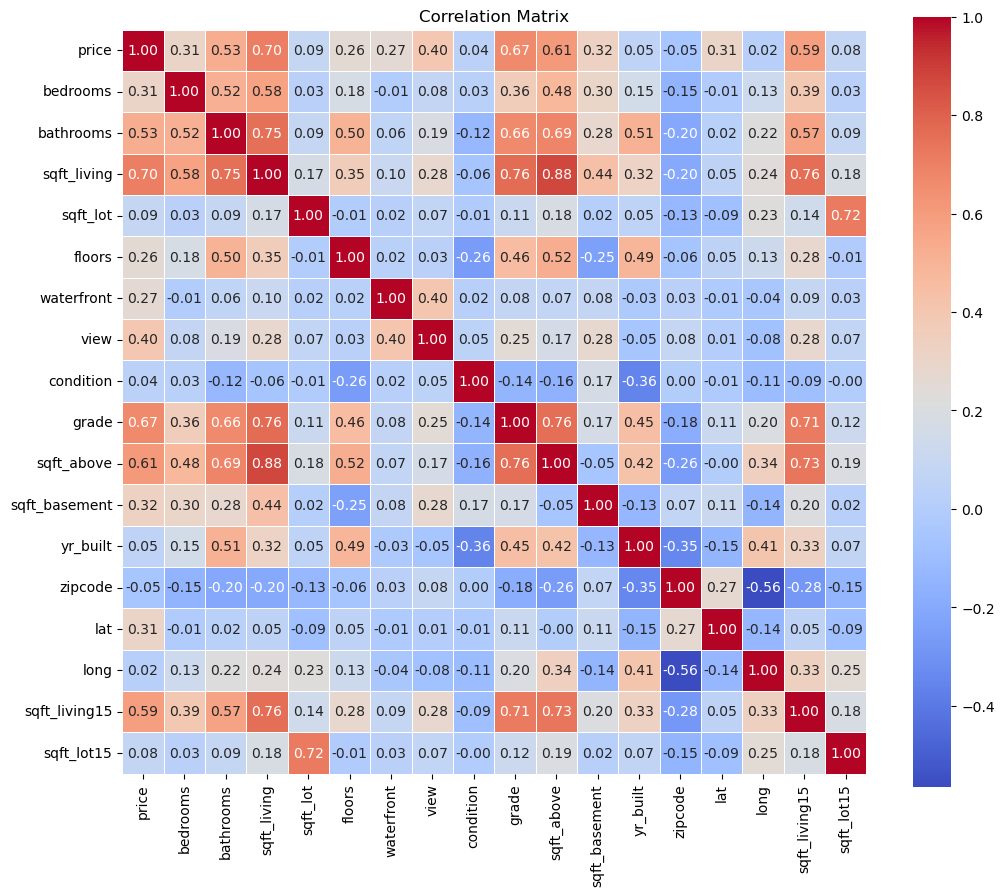

In [335]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

In [314]:
# df = df.drop(['view', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_basement'], axis = 1)

In [315]:
# Split the dataset into X and y columns
y = df[['price']]                    # Dependent variable
X = df.drop(['price'], axis = 1)     # Independent variables

In [321]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Show the rows and columns
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21613, 17), (21613, 1), (17290, 17), (17290, 1), (4323, 17), (4323, 1))

In [322]:
# # Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression 

In [328]:
param_grid = {
    'fit_intercept': [True, False]
}
# Create a base model
lr_model = LinearRegression()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid,
                           cv=5, n_jobs=-1,verbose=1, scoring='r2')
grid_search.fit(X_train, y_train)
# grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]}, scoring='r2',
             verbose=1)

In [329]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056273,0.007656,0.003125,0.00625,True,{'fit_intercept': True},0.681246,0.684057,0.712453,0.714326,0.695366,0.697490,0.013829,1
1,0.027663,0.006790,0.008516,0.00606,False,{'fit_intercept': False},0.681250,0.683959,0.712210,0.714637,0.695079,0.697427,0.013880,2


In [330]:
print(f"The best training accuracy of {grid_search.best_score_:.3f} is achieved using the following parameters:\n\n {grid_search.best_params_}")
print(f"\nUsing the best parameters, the model can achieve an accuracy of {grid_search.score(X_test, y_test):.3f} on the test data.")

The best training accuracy of 0.697 is achieved using the following parameters:

 {'fit_intercept': True}

Using the best parameters, the model can achieve an accuracy of 0.701 on the test data.


In [332]:
# Calculate the intercept and coefficient
intercept = grid_search.best_estimator_.intercept_
coefficients = grid_search.best_estimator_.coef_
print(f"The y-intercept value for the multiple regression is: {intercept[0]:.3f}\n")
print(f"The coefficient values for the multiple regession are: \n{coefficients}")

The y-intercept value for the multiple regression is: 7852857.789

The coefficient values for the multiple regession are: 
[[-3.46815688e+04  4.69686803e+04  1.09090165e+02  8.60253957e-02
   8.10507396e+03  5.67356462e+05  5.39887970e+04  2.22592654e+04
   9.50144065e+04  6.98999912e+01  3.91901743e+01 -2.81017972e+03
  -5.57169030e+02  5.93619151e+05 -1.91658505e+05  2.02057093e+01
  -3.19271405e-01]]


In [333]:
# Making predictions on the testing set
y_pred = grid_search.predict(X_test)
# Find the y-intercept of the regression line
y_intercept = y_pred[0]
print(y_intercept)
print(y_pred)

[460350.28149358]
[[ 460350.28149358]
 [ 749952.08827639]
 [1239760.47062747]
 ...
 [ 422603.33814503]
 [ 617439.23861788]
 [ 441672.27611473]]


In [334]:
# Calculate the error values f""
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred):.3f}")
# print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}")
print(f"R^2 test: {metrics.r2_score(y_test, y_pred):.3f}")

Mean Absolute Error: 127649.685
Root Mean Squared Error: 212647.838
R^2 test: 0.701


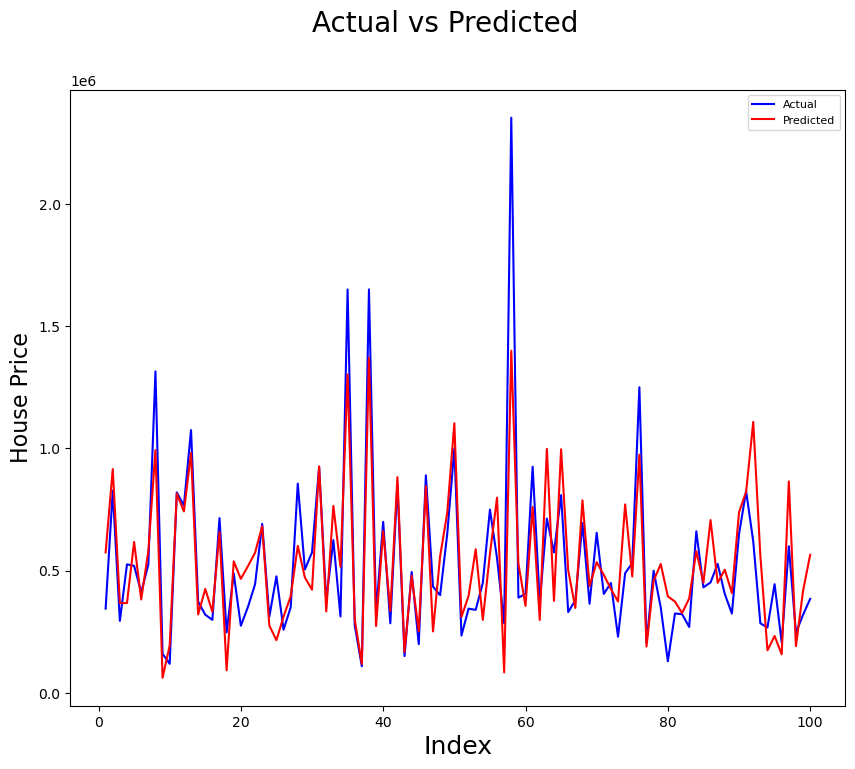

In [286]:
# Sample a subset of the data for plotting
sample_size = 100
indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[indices]
y_pred_sample = y_pred[indices]

c = [i for i in range(1, sample_size+1, 1)]  # Generating index

fig = plt.figure(figsize=(10,8))
plt.plot(c, y_test_sample, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(c, y_pred_sample, color="red", linewidth=1.5, linestyle="-", label="Predicted")
fig.suptitle('Actual vs Predicted', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize = 18)                  # X-label
plt.ylabel('House Price', fontsize = 16)                  # Y-label
plt.legend(fontsize = 8)                           # Adding legend
plt.show()

Text(0, 0.5, 'ytest-ypred')

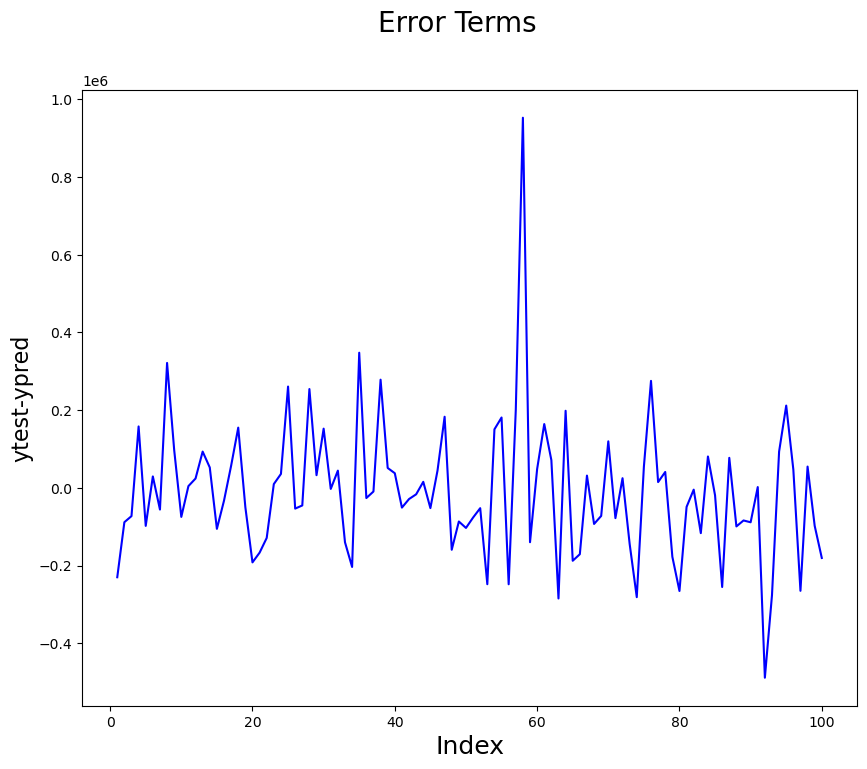

In [287]:
# Error terms
fig = plt.figure(figsize=(10,8))
plt.plot(c,y_test_sample-y_pred_sample, color="blue", linewidth=1.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

## kNN Regression

In [237]:
neighbors = np.arange(1, 21)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))      # Declare and initialise the matrix

In [140]:
for i, k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 10
    kNN_model = KNeighborsRegressor(n_neighbors = k)            # Initialise an object knn using KNeighborsClassifier method

    # Fit the model
    kNN_model.fit(X_train, y_train)                              # Call fit method to implement the ML KNeighborsClassifier model
    # Compute accuracy on the training set
    train_accuracy[i] = kNN_model.score(X_train, y_train)        # Save the score value in the train_accuracy array
    # Compute accuracy on the test set
    test_accuracy[i] = kNN_model.score(X_test, y_test)           # Save the score value in the test_accuracy array

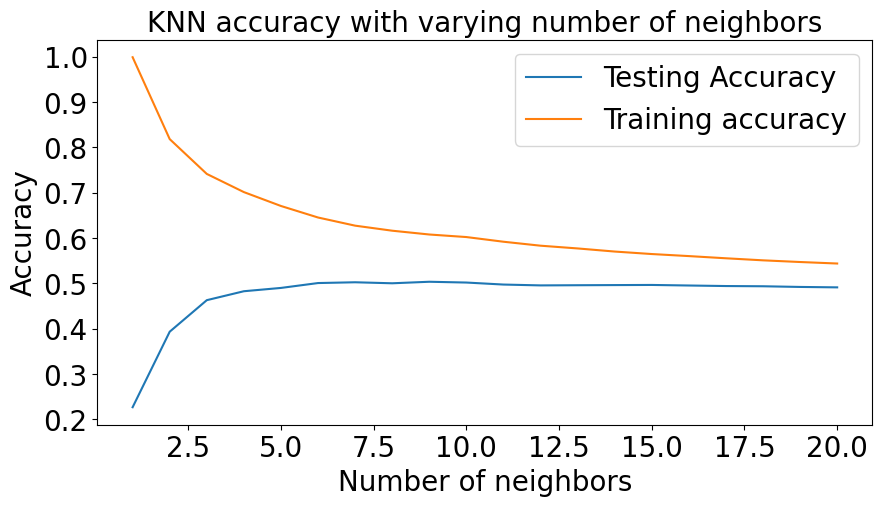

In [141]:
plt.figure(figsize = (10, 5))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [288]:
param_grid = {
    'n_neighbors': range(2, 21, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
# Create a base model
kNN_model = KNeighborsRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=kNN_model, param_grid=param_grid,
                           cv=8, n_jobs= -1,verbose= 1)
grid_search.fit(X_train, y_train)

Fitting 8 folds for each of 40 candidates, totalling 320 fits


GridSearchCV(cv=8, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 21, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [289]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009408,0.002716,0.897646,0.020895,2,1,uniform,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",0.418936,0.440708,0.454909,0.438543,0.454994,0.479607,0.536885,0.466975,0.461445,0.033349,37
1,0.006976,0.006199,0.906158,0.017963,2,1,distance,"{'n_neighbors': 2, 'p': 1, 'weights': 'distance'}",0.415088,0.443840,0.456310,0.444259,0.449716,0.468947,0.534013,0.464378,0.459569,0.032057,38
2,0.003898,0.003979,0.306189,0.007743,2,2,uniform,"{'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}",0.377737,0.405232,0.442411,0.426900,0.430744,0.466234,0.445888,0.426807,0.427744,0.025109,40
3,0.007112,0.006211,0.294688,0.005345,2,2,distance,"{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}",0.374061,0.409228,0.449166,0.434018,0.428998,0.456674,0.447967,0.427346,0.428432,0.024917,39
4,0.005859,0.007565,0.880942,0.010875,4,1,uniform,"{'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}",0.494756,0.522277,0.506868,0.508559,0.535229,0.528087,0.562777,0.538833,0.524673,0.020165,23


In [290]:
print(f"The best training accuracy of {grid_search.best_score_:.3f} is achieved using the following parameters:\n\n {grid_search.best_params_}")
print(f"\nUsing the best parameters, the model can achieve an accuracy of {grid_search.score(X_test, y_test):.3f} on the test data.")

The best training accuracy of 0.556 is achieved using the following parameters:

 {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Using the best parameters, the model can achieve an accuracy of 0.563 on the test data.


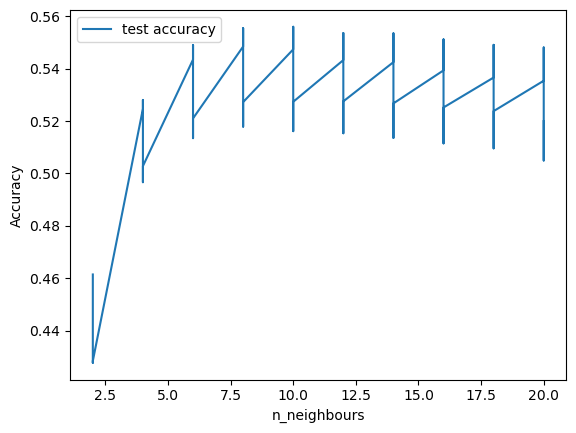

In [291]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_neighbors"],
         # scores["param_weights"]
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("n_neighbours")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [292]:
# Predict the results for X_test
print(f"Test set predictions:\n{grid_search.predict(X_test)}")

Test set predictions:
[[400844.58427686]
 [730760.28147802]
 [952690.22223292]
 ...
 [689768.52593331]
 [399025.27931623]
 [269205.26545567]]


In [293]:
# Calculate the R^2 score
print(f"Test set R^2: {grid_search.score(X_test, y_test):.3f}")

Test set R^2: 0.563


# Analyzing KNeighbours Regressor

## Artifical Neural Network

In [172]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [173]:
# Build the regression ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with linear activation for regression
])

C:\Users\marty\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [174]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [175]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - loss: 415940116480.0000 - val_loss: 400274096128.0000
Epoch 2/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 406327033856.0000 - val_loss: 379838660608.0000
Epoch 3/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 397001752576.0000 - val_loss: 333939507200.0000
Epoch 4/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 337069735936.0000 - val_loss: 266830987264.0000
Epoch 5/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 267606376448.0000 - val_loss: 194475737088.0000
Epoch 6/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 194495430656.0000 - val_loss: 135200309248.0000
Epoch 7/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 135257767936.0000 - val_loss: 97789599744.0000
Epoch 8/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 98799869952.0000 - val_loss: 79303090176.0000
Epoch 9/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 80181231616.0000 - val_loss: 71179214848.0000
Epoch 10/50
426

In [176]:
# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 37654507520.0000
Test Loss: 36816723968.0
